<span style="color:Gray"><i>Exercise 28</i></span>

# Artificial Intelligence w Marketingu Bankowym – Threshold ROC curve part 3

### Threshold ROC curve
W poprzedniej części stworzyliśmy model, który skazał którzy klienci prawdopodobnie wezmą kredyt oraz tych,  którzy niestety, raczej nie skorzystają z tej oferty banku. 
Jak pamiętamy listę zamówił Kierownik Marketingu Bankowego, potrzebował wskazania w grupie 150 klientów osób rokujących na sprzedaż produktu. Kierownik chciał na nich skoncentrować swoje wysiłki sprzedażowe. 
Model użyty w poprzedniej części analizy wskazał, że 46 klientów spośród 150 prawdopodobnie weźmie w przyszłości kredyt.
Kierownik nie był do końca zadowolony z takiej zero-jedynkowej informacji. Liczył na to, że klienci będą jakoś pogrupowani, że będzie mógł jakąś bardzie zróżnicowaną odpowiedź. Sposobem na zróżnicowaną klasyfikację okazało się sterowanie progiem czułości modelu: Threshold ROC curve.

<span style="color:blue">Dla czytelności procesu sterowania progami modelu regresji liniowej, część analizy z poprzedniej części została powtórzona poniżej. </span>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
import matplotlib.pylab as plt
from pylab import plot, show, subplot, specgram, imshow, savefig
from sklearn import preprocessing
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import Imputer

import matplotlib.pyplot as plote

%matplotlib inline

plt.style.use('ggplot')

In [2]:
df = pd.read_csv('c:/1/bank.csv')
df.head()

,Unnamed: 0,Unnamed: 0.1,age,job,marital,education,default,housing,loan,contact,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,0,0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,1,1,53,technician,married,unknown,no,no,no,cellular,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,2,2,28,management,single,university.degree,no,yes,no,cellular,...,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,3,3,39,services,married,high.school,no,no,no,cellular,...,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,4,4,55,retired,married,basic.4y,no,yes,no,cellular,...,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,1


#  <span style="color:darkRED"> Jak w praktyce zastosować model Linear Regression w marketingu bankowym?
</span>

Departament marketingu bankowego niedawno przeprowadził akcję promocyjną. Klienci byli zachęcani do skorzystania z oferty banku - zaciągania kredytów w rachunku bieżącym. Cała operacja została skrupulatnie odnotowana w formie tabeli danych. Tabelę danych można znaleźć pod adresem:  https://archive.ics.uci.edu/ml/machine-learning-databases/00222/

### Dane klienta banku

<span style="color:green"><b>age:</b></span> (numerycznie)

<span style="color:green"><b>job:</b></span> rodzaj pracy (kategorycznie: „admin.”, „Pracownik fizyczny”, „przedsiębiorca”, „pokojówka”, „zarządzanie”, „emerytowany”, „samozatrudniony”, „ usługi ”,„ student ”,„ technik ”,„ bezrobotny ”,„ nieznany ”)

<span style="color:green"><b> marital:</b></span> stan cywilny (kategorycznie:„ rozwiedziony ”,„ żonaty ”,„ samotny ”,„ nieznany ”; uwaga:„ rozwiedziony ”oznacza rozwiedziony lub owdowiały)

<span style="color:green"><b> education: </b></span>(kategoryczne: „podstawowy. 4 lata”, „podstawowy. 6 lat”, „podstawowy. 9 lat”, „szkoła średnia”, „analfabeta”, „kurs zawodowy”, „uniwersytet. stopień”, „nieznane”)

<span style="color:green"><b> default:</b></span> czy kredyt jest niespłacony? (kategorycznie: „nie”, „tak”, „nieznany”)

<span style="color:green"><b> housing:</b></span> ma kredyt mieszkaniowy? (kategorycznie: „nie”, „tak”, „nieznany”) 

<span style="color:green"><b> loan:</b> </span>czy pożyczka osobista? (kategorycznie: „nie”, „tak”, „nieznany”)
Powiązane z ostatnim kontaktem bieżącej kampanii

<span style="color:green"><b> contact:</b></span> typ komunikacji kontaktowej (kategorycznie: „komórkowy”, „telefon”)

<span style="color:green"><b> month:</b></span>ostatni miesiąc kontaktowy w roku (kategorycznie: „jan”, „lut”, „mar”, ..., „lis”, „dec”)

<span style="color:green"><b> day_of_week:</b></span> ostatni dzień tygodnia w tygodniu (kategorycznie: „pon”, „wt”, „środ”, „czw”, „pt”)

<span style="color:green"><b> duration: </b></span>czas trwania ostatniego kontaktu, w sekundach (numerycznie) . Ważna uwaga: ten atrybut ma duży wpływ na docelowy wynik (np. Jeśli czas trwania = 0, to y = „nie”). Jednak czas trwania nie jest znany przed wykonaniem połączenia. Ponadto po zakończeniu połączenia y jest oczywiście znane. W związku z tym dane te należy uwzględnić wyłącznie do celów porównawczych i należy je odrzucić, jeżeli intencją jest stworzenie realistycznego modelu predykcyjnego.
Inne atrybuty

<span style="color:green"><b> campaign:</b></span> liczba kontaktów wykonanych podczas tej kampanii i dla tego klienta (numerycznie, obejmuje ostatni kontakt)

<span style="color:green"><b> pdays:</b></span> liczba dni, które upłynęły od ostatniego kontaktu klienta z poprzedniej kampanii (numerycznie; 999 oznacza, że klient nie był wcześniej skontaktowano się)

<span style="color:green"><b> previous:</b></span> liczba kontaktów wykonanych przed tą kampanią i dla tego klienta (numerycznie)

<span style="color:green"><b> poutcome:</b></span>wynik poprzedniej kampanii marketingowej (kategorycznie: „porażka”, „nieistniejąca”, „sukces”)
Atrybuty kontekstu społecznego i gospodarczego

<span style="color:green"><b> emp.var.rate: </b></span>wskaźnik zmienności zatrudnienia - wskaźnik kwartalny (liczbowy)

<span style="color:green"><b> Cons.price.idx: </b></span>wskaźnik cen konsumpcyjnych - wskaźnik miesięczny (liczbowy)

<span style="color:green"><b> cons.conf.idx: </b></span>wskaźnik zaufania konsumentów - wskaźnik miesięczny (liczbowy )

<span style="color:green"><b> euribor3 mln: </b></span>stawka 3-miesięczna euribor - wskaźnik dzienny (liczbowy)

<span style="color:green"><b> nr_employed: </b></span>liczba zatrudnionych: liczba pracowników - wskaźnik kwartalny (liczbowy)

Poprzednią analize Marketingu Bankowego, można znaleźć pod adresem: 
http://sigmaquality.pl/machine-learning/artificial-intelligence-w-marketingu-bankowym 

Kierownik Marketingu Bankowego dowiedział się z niej, jakie grupy klientów są najbardziej przewidywalne oraz które zmienne wpływają na decyzję klientów. Dowiedział się również, jakie znaczenie mają określone techniki operacyjne takie jak średni czas rozmowy i liczba kontaktów z klientem. Jak ważny jest czas między kolejnymi kontaktami, czego unikać a o czym rozmawiać z klientami. Te informacje pozwolą kierownikowi podnieść efektywność sprzedaży w kolejnych kampaniach promocyjnych. 

Przyjmijmy, że dane zamieszczone pod powyższym adresem  (https://archive.ics.uci.edu/ml/machine-learning-databases/00222/) są danymi historycznymi banku z poprzednich akcji promocyjnych. Teraz Kierownik Marketingu Bankowego ma listą 150 nowych klientów banku. Kierownik chce wiedzieć, którzy klienci, na podstawie historii poprzednich akcji promocyjnych, najprawdopodobniej wezmą kredyt. 
Kierownik dysponując określonymi zasobami ludzkimi i czasem, chce więc skoncentrować swoje wysiłki na określonych, wskazanych przez algorytm artificial intelligence klientach. Dzięki temu ma nadzieję na poprawę efektywności sprzedaży banku. 

Ponieważ nie posiadamy listy 150 nowych klientów, wydzielimy 150 przypadkowych rekordów z bazy UC Irvine Machine Learning Repository (https://archive.ics.uci.edu/ml/machine-learning-databases/00222/)



<span style="color:darkblue"> Wydzielam listę 150 nowych klientó banku</span>

In [3]:
df = pd.read_csv('c:/1/bank.csv')
df3 = df.sample(150)

In [4]:
df3.shape

(150, 23)

Niestety nie można wykorzystać modeli z poprzedniej analizy ponieważ zawiera on zmienne, których nie potrafimy przewidzieć w przyszłości.
Nie wiemy jaki będzie czas kontaktu. Nie wiemy ile będzie rozmów konsultant banku z klientem ponieważ to zwykle klient decyduje jak długo i ile razy chce rozmawiać. 


<span style="color:green"> duration: </span>czas trwania ostatniego kontaktu, w sekundach (numerycznie) . Ważna uwaga: ten atrybut ma duży wpływ na docelowy wynik (np. Jeśli czas trwania = 0, to y = „nie”). Jednak czas trwania nie jest znany przed wykonaniem połączenia. Ponadto po zakończeniu połączenia y jest oczywiście znane. W związku z tym dane te należy uwzględnić wyłącznie do celów porównawczych i należy je odrzucić, jeżeli intencją jest stworzenie realistycznego modelu predykcyjnego.

In [5]:
df.head()

,Unnamed: 0,Unnamed: 0.1,age,job,marital,education,default,housing,loan,contact,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,0,0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,1,1,53,technician,married,unknown,no,no,no,cellular,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,2,2,28,management,single,university.degree,no,yes,no,cellular,...,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,3,3,39,services,married,high.school,no,no,no,cellular,...,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,4,4,55,retired,married,basic.4y,no,yes,no,cellular,...,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,1


Musimy z pierwotnej bazy wykasować kilka kolumn:

<span style="color:blue">Usuwam kolumny: 'day_of_week','month','previous','campaign','duration', 'contact', 'y'</span>

In [6]:
df.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'age', 'job', 'marital', 'education',
       'default', 'housing', 'loan', 'contact', 'month', 'day_of_week',
       'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'emp_var_rate',
       'cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed', 'y'],
      dtype='object')

In [7]:
df2 = df[['age', 'job', 'marital', 'education','default', 'housing', 'loan', 'poutcome', 'emp_var_rate','cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed','y']]

Podobny zabieg trzeba wykonać dla zbioru 'kierownika marketingu', listy nowych 150 klientów oznaczonej jako df3, wycinamy te same, nieznane w przyszłości zmienne egzogeniczne. Tym razem jednak musimy też wyciąć zmienną wynikową y ponieważ nie wiemy, czy kredyt zostanie sprzedany.

In [8]:
df3 = df3[['age', 'job', 'marital', 'education','default', 'housing', 'loan', 'poutcome', 'emp_var_rate','cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed']]

In [9]:
df2.head(5)

,age,job,marital,education,default,housing,loan,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,unknown,yes,no,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,no,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic.4y,no,yes,no,success,-2.9,92.201,-31.4,0.869,5076.2,1


# Tworzenie Dummy Variables
Wybieram kolumny tekstowe, dyskretne, do głębszej analizy.

<span style="color:blue">Wyświetlamy kolumny zmiennnych dyskretnych</span>

In [10]:
df2.describe(include=["object"]).columns

Index(['job', 'marital', 'education', 'default', 'housing', 'loan',
       'poutcome'],
      dtype='object')

In [11]:
list = ['job', 'marital', 'education', 'default', 'housing', 'loan','poutcome']

<span style="color:blue">Transforumjemy na dane dummy variables</span>

In [12]:
df2[list] = df2[list].apply(LabelEncoder().fit_transform)
df2[list].head()

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3391: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


,job,marital,education,default,housing,loan,poutcome
0,1,1,0,1,2,0,1
1,9,1,7,0,0,0,1
2,4,2,6,0,2,0,2
3,7,1,3,0,0,0,1
4,5,1,0,0,2,0,2


<span style="color:blue">Dzielimy nowy zbiór df2 na zmienne opisujące i zmienną wynikową.</span>

In [13]:
y = df2['y']
X = df2.drop('y', axis=1) 

<span style="color:blue">Dzielimy zbiór df2 na zbiór testowy i zbiór treningowy.</span>

In [14]:
from sklearn.model_selection import train_test_split 
Xtrain, Xtest, ytrain, ytest = train_test_split(X,y, test_size=0.33, stratify = y, random_state = 148)

# <span style="color:blue">OVERSAMPLING </span>

Dla nowego zbioru df2 bo zmienna wynikowa nie jest zbilansowana. Oversampling robimy na zmiennych treningowych.

In [15]:
df2.y.value_counts(dropna = False, normalize=True)

0    0.887346
1    0.112654
Name: y, dtype: float64

In [16]:
Proporcja = sum(ytrain == 0) / sum(ytrain == 1) 
Proporcja = np.round(Proporcja, decimals=0)
Proporcja = Proporcja.astype(int)
print('Ile na jedną sybskrypcje przypada nieprzedłużonych subskrypcji:',Proporcja)

Ile na jedną sybskrypcje przypada nieprzedłużonych subskrypcji: 8


<span style="color:blue">Replikacja zmiennych wynikowych w zbiorze treningowym</span>

In [17]:
ytrain_pos_OVS = pd.concat([ytrain[ytrain==1]] * Proporcja, axis = 0) 
print('Ilość zmiennych wynikowych y  w zbiorze treningowym df2 po replikacji:' ,ytrain_pos_OVS.count())

Ilość zmiennych wynikowych y  w zbiorze treningowym df2 po replikacji: 24872


<span style="color:blue">Replikacja zmiennych niezależnych w zbiorze treningowym</span>

In [18]:
Xtrain_pos_OVS = pd.concat([Xtrain.loc[ytrain==1, :]] * Proporcja, axis = 0)

In [19]:
ytrain_pos_OVS = pd.concat([ytrain[ytrain==1]] * Proporcja, axis = 0) 
print('Ilość zmiennych niezależnychX  z zbiorze treningowym df2 po replikacji:')
Xtrain_pos_OVS.count()

Ilość zmiennych niezależnychX  z zbiorze treningowym df2 po replikacji:


age               24872
job               24872
marital           24872
education         24872
default           24872
housing           24872
loan              24872
poutcome          24872
emp_var_rate      24872
cons_price_idx    24872
cons_conf_idx     24872
euribor3m         24872
nr_employed       24872
dtype: int64

<span style="color:blue">Wprowadzenie nowych, zreplikowanych zmiennych do zbioru treningowego</span>

In [20]:
ytrain_OVS = pd.concat([ytrain, ytrain_pos_OVS], axis = 0).reset_index(drop = True)
Xtrain_OVS = pd.concat([Xtrain, Xtrain_pos_OVS], axis = 0).reset_index(drop = True)

<span style="color:blue">Sprawdzenie ilość wierszy w zbiorach przed i po oversampling</span>

In [21]:
print ('Zbiór X treningowy: ',Xtrain.shape)
print ('Zbiór X testowy:    ', Xtest.shape)
print ('Zbiór y treningowy: ', ytrain.shape)
print ('Zbiór y testowy:    ', ytest.shape)

Zbiór X treningowy:  (27595, 13)
Zbiór X testowy:     (13593, 13)
Zbiór y treningowy:  (27595,)
Zbiór y testowy:     (13593,)


In [22]:
Xtrain_OVS.head(3)

,age,job,marital,education,default,housing,loan,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed
0,49,1,1,2,1,0,0,1,1.4,94.465,-41.8,4.959,5228.1
1,38,9,0,6,1,0,0,1,1.4,93.444,-36.1,4.963,5228.1
2,42,0,0,6,0,0,0,1,1.4,94.465,-41.8,4.959,5228.1


# Logistic Regression na zbiorze df2

In [23]:
import numpy as np
from sklearn import model_selection
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV


Parameteres = {'C': np.power(10.0, np.arange(-3, 3))}
LR = LogisticRegression(warm_start = True)
LR_Grid = GridSearchCV(LR, param_grid = Parameteres, scoring = 'roc_auc', n_jobs = 5, cv=2)

LR_Grid.fit(Xtrain_OVS, ytrain_OVS)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


GridSearchCV(cv=2, error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=True),
             iid='warn', n_jobs=5,
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='roc_auc', verbose=0)

<span style="color:blue">Podstawienie do wzoru</span>

In [24]:
ypred_OVS = LR_Grid.predict(Xtest)

<span style="color:blue">Blok diagnostyczny</span>

Recall Training data:      0.6845
Precision Training data:   0.7733
----------------------------------------------------------------------
Recall Test data:          0.6839
Precision Test data:       0.267
----------------------------------------------------------------------
Confusion Matrix Test data
[[9187 2875]
 [ 484 1047]]
----------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.95      0.76      0.85     12062
           1       0.27      0.68      0.38      1531

    accuracy                           0.75     13593
   macro avg       0.61      0.72      0.61     13593
weighted avg       0.87      0.75      0.79     13593



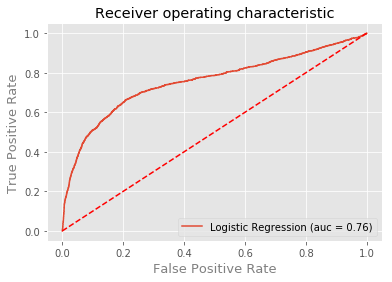

In [25]:
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import confusion_matrix, log_loss, auc, roc_curve, roc_auc_score, recall_score, precision_recall_curve
from sklearn.metrics import make_scorer, precision_score, fbeta_score, f1_score, classification_report

print("Recall Training data:     ", np.round(recall_score(ytrain_OVS, LR_Grid.predict(Xtrain_OVS)), decimals=4))
print("Precision Training data:  ", np.round(precision_score(ytrain_OVS, LR_Grid.predict(Xtrain_OVS)), decimals=4))
print("----------------------------------------------------------------------")
print("Recall Test data:         ", np.round(recall_score(ytest, LR_Grid.predict(Xtest)), decimals=4)) 
print("Precision Test data:      ", np.round(precision_score(ytest, LR_Grid.predict(Xtest)), decimals=4))
print("----------------------------------------------------------------------")
print("Confusion Matrix Test data")
print(confusion_matrix(ytest, LR_Grid.predict(Xtest)))
print("----------------------------------------------------------------------")
print(classification_report(ytest, LR_Grid.predict(Xtest)))
y_pred_proba = LR_Grid.predict_proba(Xtest)[::,1]
fpr, tpr, _ = metrics.roc_curve(ytest,  y_pred_proba)
auc = metrics.roc_auc_score(ytest, y_pred_proba)
plt.plot(fpr, tpr, label='Logistic Regression (auc = %0.2f)' % auc)
plt.xlabel('False Positive Rate',color='grey', fontsize = 13)
plt.ylabel('True Positive Rate',color='grey', fontsize = 13)
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.legend(loc=4)
plt.plot([0, 1], [0, 1],'r--')
plt.show()

Model wyszedł raczej słaby - teraz nie będziemy polepszać modelu, lecz skoncentrujemy się na tym jak zastosować go w praktyce. Mamy zbiór 150 nowych klientów w zbiorze df3. Kierownik departamentu Marketingu Bankowego, powinien wiedzieć, na których klientach powinien skoncentrować swoje wysiłki. Którzy klienci mogą wziąć kredyty a którzy raczej go nie wezmą. Zlikwidowaliśmy zmienne, które można otrzymać po przeprowadzonej akcji takie jak czas trwania rozmów z klientem oraz ilość kontaktów. Stworzyliśmy więc nowy model nie zawierający nieznanych w przyszłości parametrów. Model jest słabszy od modelu z pełnymi danymi lecz wciąż jest on względnie dobry.

<span style="color:blue">Podstawiamy dane do modelu</span>

In [26]:
df3.head()

,age,job,marital,education,default,housing,loan,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed
17327,47,admin.,single,high.school,no,no,no,nonexistent,-0.1,93.200,-42.0,4.021,5195.8
13964,41,admin.,single,high.school,no,yes,yes,nonexistent,1.1,93.994,-36.4,4.859,5191.0
17516,63,retired,married,professional.course,no,no,no,nonexistent,-1.8,93.075,-47.1,1.498,5099.1
282,51,management,married,university.degree,no,yes,yes,nonexistent,1.4,94.465,-41.8,4.865,5228.1
38061,25,services,divorced,high.school,no,yes,no,nonexistent,1.4,93.918,-42.7,4.957,5228.1


In [27]:
df3.shape

(150, 13)

Zróbmy kopie df3 aby zrobić na niej Dummy Variables

In [28]:
df3dummy = df3.copy()

In [29]:
df3dummy.head()

,age,job,marital,education,default,housing,loan,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed
17327,47,admin.,single,high.school,no,no,no,nonexistent,-0.1,93.200,-42.0,4.021,5195.8
13964,41,admin.,single,high.school,no,yes,yes,nonexistent,1.1,93.994,-36.4,4.859,5191.0
17516,63,retired,married,professional.course,no,no,no,nonexistent,-1.8,93.075,-47.1,1.498,5099.1
282,51,management,married,university.degree,no,yes,yes,nonexistent,1.4,94.465,-41.8,4.865,5228.1
38061,25,services,divorced,high.school,no,yes,no,nonexistent,1.4,93.918,-42.7,4.957,5228.1


<span style="color:blue">Transforumjemy dane tekstowe na dane dummy variables</span>

# <span style="color:blue"> Dummy Variables</span>
Mamy zwykły zbiór danych kierownika marketingu, musimy go przerobić na Dummy Variables aby logistic Regression mógł dokonać predykcji.

<span style="color:blue">Wyświetlamy kolumny zmiennnych dyskretnych</span>

In [30]:
df3dummy.describe(include=["object"]).columns

Index(['job', 'marital', 'education', 'default', 'housing', 'loan',
       'poutcome'],
      dtype='object')

In [31]:
list = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'poutcome']

In [32]:
df3dummy[list] = df3dummy[list].apply(LabelEncoder().fit_transform)
df3dummy[list].head()

,job,marital,education,default,housing,loan,poutcome
17327,0,2,3,0,0,0,1
13964,0,2,3,0,2,2,1
17516,5,1,4,0,0,0,1
282,4,1,5,0,2,2,1
38061,7,0,3,0,2,0,1


In [33]:
df3dummy.head(4)

,age,job,marital,education,default,housing,loan,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed
17327,47,0,2,3,0,0,0,1,-0.1,93.200,-42.0,4.021,5195.8
13964,41,0,2,3,0,2,2,1,1.1,93.994,-36.4,4.859,5191.0
17516,63,5,1,4,0,0,0,1,-1.8,93.075,-47.1,1.498,5099.1
282,51,4,1,5,0,2,2,1,1.4,94.465,-41.8,4.865,5228.1


<span style="color:blue">Podstawienie do wzoru</span>

In [34]:
ypred_OVS3 = LR_Grid.predict(df3dummy)

In [35]:
ypred_OVS3.shape

(150,)

In [36]:
df3['Wynik'] = ypred_OVS3

<span style="color:blue">Tworzenie listy dla kierownika marketingu</span>

In [37]:
print('Lista kierownika marketingu bankowego')
df3[df3['Wynik']==1].head(4)

Lista kierownika marketingu bankowego


,age,job,marital,education,default,housing,loan,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,Wynik
17516,63,retired,married,professional.course,no,no,no,nonexistent,-1.8,93.075,-47.1,1.498,5099.1,1
3037,34,services,married,high.school,no,no,no,nonexistent,-1.8,93.075,-47.1,1.445,5099.1,1
37550,40,blue-collar,married,basic.9y,unknown,no,no,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,1
32961,46,technician,married,professional.course,no,yes,no,nonexistent,-1.8,92.893,-46.2,1.291,5099.1,1


<span style="color:blue">Statystyka </span>

In [38]:
df3.pivot_table(index = ['marital'], columns='Wynik', values='age', aggfunc='count', margins=True, margins_name='RAZEM')

Wynik,0,1,RAZEM
marital,,,
divorced,10,3,13
married,65,27,92
single,25,20,45
RAZEM,100,50,150


# <span style="color:red">Threshold ROC curve </span>

Nowy model stworzony do prognozy zakupu kredytów dla 150 nowych klientów banku nie przekonał kirownika marketingu bankowego.
Uważa on, że potencjanie więcej klientów powinno skorzystać z ofery banku.
Dlatego po naradzie ze swoim zespołem poprosił aby zwiększyć czułość klasyfikatora regresji logistycznej tak aby było więcej potencjalnych chętnych na kredyt. Chciał również aby pojawiły się grupy klientów według prawdopodobieństwa zakupu kredytu. Threshold ROC curve.

## Zmiana progu ROC   (threshold) na poziom 0.2

## W modelu regresji logistycznej domyślny próg prawdopodobieństwa wynosi 0,5%. Teraz dokonam przesunięcia progu do poziomu 0,2%.

In [39]:
LR_Grid_ytest = LR_Grid.predict_proba(Xtest)[:, 1]
# new threshold = 0.5
ytest_predT02 = (LR_Grid_ytest >= 0.2).astype(int)

In [40]:
ytest_predT02.shape

(13593,)

In [41]:
LR_Grid.predict(Xtest).shape

(13593,)

In [42]:
ytest.shape

(13593,)

<span style="color:blue">ZMIENIONY Blok diagnostyczny</span>

Recall Training data:      0.6845
Precision Training data:   0.2749
----------------------------------------------------------------------
Recall Test data:          0.9784
Precision Test data:       0.1133
----------------------------------------------------------------------
Confusion Matrix Test data
[[9187 2875]
 [ 484 1047]]
----------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.95      0.76      0.85     12062
           1       0.27      0.68      0.38      1531

    accuracy                           0.75     13593
   macro avg       0.61      0.72      0.61     13593
weighted avg       0.87      0.75      0.79     13593



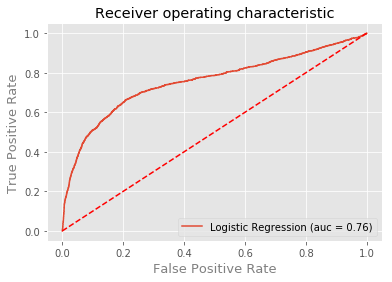

In [43]:
print("Recall Training data:     ", np.round(recall_score(ytrain, LR_Grid.predict(Xtrain)), decimals=4))
print("Precision Training data:  ", np.round(precision_score(ytrain, LR_Grid.predict(Xtrain)), decimals=4))
print("----------------------------------------------------------------------")
print("Recall Test data:         ", np.round(recall_score(ytest, ytest_predT02), decimals=4)) 
print("Precision Test data:      ", np.round(precision_score(ytest,ytest_predT02), decimals=4))
print("----------------------------------------------------------------------")
print("Confusion Matrix Test data")
print(confusion_matrix(ytest, LR_Grid.predict(Xtest)))
print("----------------------------------------------------------------------")
print(classification_report(ytest, LR_Grid.predict(Xtest)))
y_pred_proba = LR_Grid.predict_proba(Xtest)[::,1]
fpr, tpr, _ = metrics.roc_curve(ytest,  y_pred_proba)
auc = metrics.roc_auc_score(ytest, y_pred_proba)
plt.plot(fpr, tpr, label='Logistic Regression (auc = %0.2f)' % auc)
plt.xlabel('False Positive Rate',color='grey', fontsize = 13)
plt.ylabel('True Positive Rate',color='grey', fontsize = 13)
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.legend(loc=4)
plt.plot([0, 1], [0, 1],'r--')
plt.show()

In [44]:
ytest_predT02.sum()

13218


------Training data---------------------------------------------------
RECALL Training data (new_threshold = 0.2):       0.684
PRECISION Training data (new_threshold = 0.2):    0.275
------Test data-------------------------------------------------------
RECALL Test data (new_threshold = 0.2):         0.978
PRECISION Test data (new_threshold = 0.2):      0.113

The Confusion Matrix Test data (new_threshold = 0.2):-----------------
[[  342 11720]
 [   33  1498]]
----------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.91      0.03      0.05     12062
           1       0.11      0.98      0.20      1531

    accuracy                           0.14     13593
   macro avg       0.51      0.50      0.13     13593
weighted avg       0.82      0.14      0.07     13593



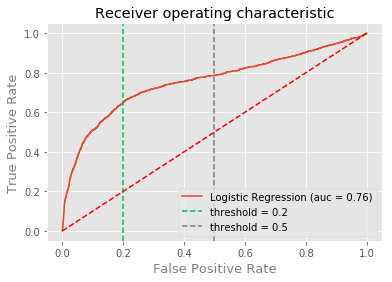

In [45]:
print("\n------Training data---------------------------------------------------")
print("RECALL Training data (new_threshold = 0.2):      ", np.round(recall_score(ytrain, LR_Grid.predict(Xtrain)), decimals=3))
print("PRECISION Training data (new_threshold = 0.2):   ", np.round(precision_score(ytrain, LR_Grid.predict(Xtrain)), decimals=3))
print("------Test data-------------------------------------------------------")
print("RECALL Test data (new_threshold = 0.2):        ", np.round(recall_score(ytest, ytest_predT02), decimals=3))
print("PRECISION Test data (new_threshold = 0.2):     ", np.round(precision_score(ytest, ytest_predT02), decimals=3))
print()
print("The Confusion Matrix Test data (new_threshold = 0.2):-----------------")
print(confusion_matrix(ytest, ytest_predT02))
print("----------------------------------------------------------------------")
print(classification_report(ytest, ytest_predT02))
# WYKRES-------------------------------------------
y_pred_proba = LR_Grid.predict_proba(Xtest)[::,1]
fpr, tpr, _ = metrics.roc_curve(ytest,  y_pred_proba)
auc = metrics.roc_auc_score(ytest, y_pred_proba)
plt.plot(fpr, tpr, label='Logistic Regression (auc = %0.2f)' % auc)
plt.axvline(0.2, color = '#00C251', linestyle = '--', label = 'threshold = 0.2')
plt.axvline(0.5, color = 'grey', linestyle = '--', label = 'threshold = 0.5')
plt.xlabel('False Positive Rate',color='grey', fontsize = 13)
plt.ylabel('True Positive Rate',color='grey', fontsize = 13)
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.legend(loc=4)
plt.plot([0, 1], [0, 1],'r--')
plt.show()

# <span style="color:blue">Klasyfikacja dla progów od 0.2 do 0.9</span> Threshold ROC curve

In [46]:
LR_Grid_ytest = LR_Grid.predict_proba(df3dummy)[:, 1]

<span style="color:blue">Klasyfikacja dla progów threshold = 0.9</span>

In [47]:
y_predT09 = (LR_Grid_ytest >= 0.9).astype(int)
y_predT09

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0])

In [48]:
df3['ResultTH09'] = y_predT09
#del df3['Wynik']
df3.head(3)

,age,job,marital,education,default,housing,loan,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,Wynik,ResultTH09
17327,47,admin.,single,high.school,no,no,no,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0,0
13964,41,admin.,single,high.school,no,yes,yes,nonexistent,1.1,93.994,-36.4,4.859,5191.0,0,0
17516,63,retired,married,professional.course,no,no,no,nonexistent,-1.8,93.075,-47.1,1.498,5099.1,1,0


In [49]:
y_predT08 = (LR_Grid_ytest >= 0.8).astype(int)
y_predT08

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0])

In [50]:
df3['ResultTH08'] = y_predT08
df3.head(3)

,age,job,marital,education,default,housing,loan,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,Wynik,ResultTH09,ResultTH08
17327,47,admin.,single,high.school,no,no,no,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0,0,0
13964,41,admin.,single,high.school,no,yes,yes,nonexistent,1.1,93.994,-36.4,4.859,5191.0,0,0,0
17516,63,retired,married,professional.course,no,no,no,nonexistent,-1.8,93.075,-47.1,1.498,5099.1,1,0,0


In [51]:
y_predT07 = (LR_Grid_ytest >= 0.7).astype(int)
y_predT07

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0])

In [52]:
df3['ResultTH07'] = y_predT07
df3.head(3)

,age,job,marital,education,default,housing,loan,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,Wynik,ResultTH09,ResultTH08,ResultTH07
17327,47,admin.,single,high.school,no,no,no,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0,0,0,0
13964,41,admin.,single,high.school,no,yes,yes,nonexistent,1.1,93.994,-36.4,4.859,5191.0,0,0,0,0
17516,63,retired,married,professional.course,no,no,no,nonexistent,-1.8,93.075,-47.1,1.498,5099.1,1,0,0,0


In [53]:
y_predT06 = (LR_Grid_ytest >= 0.6).astype(int)
y_predT06

array([0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0])

In [54]:
df3['ResultTH06'] = y_predT06
df3.head(3)

,age,job,marital,education,default,housing,loan,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,Wynik,ResultTH09,ResultTH08,ResultTH07,ResultTH06
17327,47,admin.,single,high.school,no,no,no,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0,0,0,0,0
13964,41,admin.,single,high.school,no,yes,yes,nonexistent,1.1,93.994,-36.4,4.859,5191.0,0,0,0,0,0
17516,63,retired,married,professional.course,no,no,no,nonexistent,-1.8,93.075,-47.1,1.498,5099.1,1,0,0,0,1


In [55]:
y_predT05 = (LR_Grid_ytest >= 0.5).astype(int)
y_predT05

array([0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0])

In [56]:
df3['ResultTH05'] = y_predT05
df3.head(3)

,age,job,marital,education,default,housing,loan,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,Wynik,ResultTH09,ResultTH08,ResultTH07,ResultTH06,ResultTH05
17327,47,admin.,single,high.school,no,no,no,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0,0,0,0,0,0
13964,41,admin.,single,high.school,no,yes,yes,nonexistent,1.1,93.994,-36.4,4.859,5191.0,0,0,0,0,0,0
17516,63,retired,married,professional.course,no,no,no,nonexistent,-1.8,93.075,-47.1,1.498,5099.1,1,0,0,0,1,1


In [57]:
y_predT04 = (LR_Grid_ytest >= 0.4).astype(int)
y_predT04

array([1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0])

In [58]:
df3['ResultTH04'] = y_predT04
df3.head(3)

,age,job,marital,education,default,housing,loan,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,Wynik,ResultTH09,ResultTH08,ResultTH07,ResultTH06,ResultTH05,ResultTH04
17327,47,admin.,single,high.school,no,no,no,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0,0,0,0,0,0,1
13964,41,admin.,single,high.school,no,yes,yes,nonexistent,1.1,93.994,-36.4,4.859,5191.0,0,0,0,0,0,0,1
17516,63,retired,married,professional.course,no,no,no,nonexistent,-1.8,93.075,-47.1,1.498,5099.1,1,0,0,0,1,1,1


In [59]:
y_predT03 = (LR_Grid_ytest >= 0.3).astype(int)
y_predT03

array([1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0])

In [60]:
df3['ResultTH03'] = y_predT03
df3.head(3)

,age,job,marital,education,default,housing,loan,poutcome,emp_var_rate,cons_price_idx,...,euribor3m,nr_employed,Wynik,ResultTH09,ResultTH08,ResultTH07,ResultTH06,ResultTH05,ResultTH04,ResultTH03
17327,47,admin.,single,high.school,no,no,no,nonexistent,-0.1,93.200,...,4.021,5195.8,0,0,0,0,0,0,1,1
13964,41,admin.,single,high.school,no,yes,yes,nonexistent,1.1,93.994,...,4.859,5191.0,0,0,0,0,0,0,1,1
17516,63,retired,married,professional.course,no,no,no,nonexistent,-1.8,93.075,...,1.498,5099.1,1,0,0,0,1,1,1,1


In [61]:
y_predT02 = (LR_Grid_ytest >= 0.2).astype(int)
y_predT02

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [62]:
df3['ResultTH02'] = y_predT02
df3.head(3)

,age,job,marital,education,default,housing,loan,poutcome,emp_var_rate,cons_price_idx,...,nr_employed,Wynik,ResultTH09,ResultTH08,ResultTH07,ResultTH06,ResultTH05,ResultTH04,ResultTH03,ResultTH02
17327,47,admin.,single,high.school,no,no,no,nonexistent,-0.1,93.200,...,5195.8,0,0,0,0,0,0,1,1,1
13964,41,admin.,single,high.school,no,yes,yes,nonexistent,1.1,93.994,...,5191.0,0,0,0,0,0,0,1,1,1
17516,63,retired,married,professional.course,no,no,no,nonexistent,-1.8,93.075,...,5099.1,1,0,0,0,1,1,1,1,1


## <span style="color:blue">Punktacja dla każdego klienta</span>

In [63]:
df3['Customer_classification']= df3['ResultTH02']+df3['ResultTH03']+df3['ResultTH04']+df3['ResultTH05']+df3['ResultTH06']+df3['ResultTH07']+df3['ResultTH08']+df3['ResultTH09']

In [64]:
df3.sort_values('Customer_classification')

,age,job,marital,education,default,housing,loan,poutcome,emp_var_rate,cons_price_idx,...,Wynik,ResultTH09,ResultTH08,ResultTH07,ResultTH06,ResultTH05,ResultTH04,ResultTH03,ResultTH02,Customer_classification
34067,39,blue-collar,married,basic.4y,unknown,no,no,nonexistent,1.4,93.918,...,0,0,0,0,0,0,0,0,0,0
18555,43,blue-collar,divorced,basic.9y,unknown,no,yes,nonexistent,1.4,94.465,...,0,0,0,0,0,0,0,0,0,0
15007,44,blue-collar,married,basic.9y,unknown,no,no,nonexistent,1.4,93.444,...,0,0,0,0,0,0,0,0,0,0
29545,35,retired,single,basic.6y,unknown,yes,no,nonexistent,1.4,94.465,...,0,0,0,0,0,0,0,0,1,1
31144,33,admin.,married,high.school,no,no,no,nonexistent,1.4,93.918,...,0,0,0,0,0,0,0,0,1,1
32844,38,blue-collar,married,basic.6y,unknown,yes,yes,nonexistent,1.1,93.994,...,0,0,0,0,0,0,0,0,1,1
33624,50,management,married,basic.9y,no,yes,yes,nonexistent,1.4,93.918,...,0,0,0,0,0,0,0,0,1,1
11931,36,self-employed,married,basic.6y,unknown,yes,yes,nonexistent,1.1,93.994,...,0,0,0,0,0,0,0,0,1,1
12715,42,management,married,university.degree,no,yes,no,nonexistent,1.4,93.444,...,0,0,0,0,0,0,0,0,1,1
5984,25,blue-collar,single,basic.9y,no,no,no,nonexistent,1.4,93.918,...,0,0,0,0,0,0,0,0,1,1


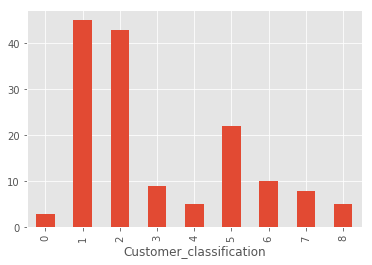

In [65]:
df3.pivot_table(index =['Customer_classification'],values='marital', aggfunc='count').plot(kind='bar', legend=False)

## Rozwiązanie

### <span style="color:darkblue">Została utworzona nowa lista która pogrupowała klientów banku w 8 kategoriach. Klienci mający kategorię 6,7,8  prawie na pewno wezmą kredyt. Klienci z kategorią 0, 1 i 2 prawie na pewno nie wezmą kredytu. Czym wyższa jest kategoria klienta tym wyższe jest prawdopodobieństwo wzięcia kredytu.</span>